<center> <h1>MANIPULANDO PIXELS DE UMA IMAGEM</h1> </center>

<h2>Sumário</h2>

    
[1. Introdução](#introducao)<br>
[2. Script de inversão da imagem em uma determinada área](#script1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Bibliotecas](#bibliotecas)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Função de inversão de cores](#funcao1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Resultados](#result1)<br>
[3. Script de troca de quadrantes de uma imagem](#script2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Função de troca de áreas](#funcao2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Resultados](#result2)<br>

<a id='introducao'></a>

<h2>1. Introdução</h2>

<p style='text-align: justify;'> Uma das primeiras etapas para o processamento de imagens utilizando a biblioteca OpenCV consiste em entender a representação dos eixos das imagens nas variáveis e como acessar a informação de cada pixel. Além disso, é de suma importância saber como alterar as informações de pixels para, por exemplo, aplicar transformações nas imagens.</p>

<p style='text-align: justify;'> Outros pontos importantes acerca deste exercício são o entendimento do processo de importação de arquivos de imagem para o tratamento em Python, bem como as formas de exibir estas imagens.</p>

<a id='script1'></a>

<h2>2. Script de inversão da imagem em uma determinada área</h2>

<p style='text-align: justify;'>Esta seção descreverá um script realizado em Python que recebe dois pontos dentro das margens de uma determinada imagem e dentro do retângulo formado por estes dois pontos, realiza a inversão das cores da imagem. Para tal, a imagem tratada está em <i>grayscale</i>, de forma a realizar a inversão em uma única matriz de cor.</p>

<a id='bibliotecas'></a>

<h3>2.1 Bibliotecas</h3>

<p style='text-align: justify;'>Inicialmente, importa-se as bibliotecas necessárias para a realização dos algoritmos. A primeira consiste na biblioteca do openCV para Python, utilizada para todo o tratamento de imagem. O numpy é utilizado para trabalhar com as matrizes da simagens. O Matplotlib foi utilizado para a exibição das imagens <i>inline</i> no <i>Jupyter Notebook</i>.</p>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<a id='funcao1'></a>

<h3>2.2 Função de inversão de cores</h3>

<p style='text-align: justify;'>A função "regions" recebe como parâmetro dois pontos especificados na imagem e uma matriz da imagem em grayscale. </p>

<p style='text-align: justify;'>Inicialmente, verifica-se se os pontos escolhidos excedem os limites da imagem. Caso isto ocorra, uma mensagem é exibida. A variável "img1" é uma cópia da imagem original e nela serão feitas as modificações.</p>

<p style='text-align: justify;'>Para realizar o processo de alteração dos pixels, é preciso acessá-los. Para isso, sem a utilização de loops, utiliza-se as funções de "max()" e "min()" para definir um subconjunto da imagem original e alterar o seu valor subtraindo de 255 o valor do pixel, obtendo assim o efeito negativo na área especificada pelos pontos.</p>

<p style='text-align: justify;'>Como explicado anteriormente, para o plot da imagem, utilizou-se o "matplotlib" no lugar do OpenCV, mas sem perda alguma.</p>

In [3]:
def regions(p1,p2,img):
    if max(p1[0],p2[0]) > np.shape(img)[0]-1 or max(p1[1],p2[1]) > np.shape(img)[1]-1:
        print("Pontos excedem os limites da imagem")
        return
    else:
        img1 = np.copy(img)
        img1[min(p1[0],p2[0]):max(p1[0],p2[0]),min(p1[1],p2[1]):max(p1[1],p2[1])] = 255 - img[min(p1[0],p2[0]):max(p1[0],p2[0]),min(p1[1],p2[1]):max(p1[1],p2[1])]
        #cv2.imshow('img',img1)
        #cv2.waitKey()
        plt.imshow(img1,cmap = "gray")
        plt.axis("off")

<a id='result1'></a>

<h3>2.3 Resultados</h3>

<p style='text-align: justify;'>Abaixo tem-se um exemplo de aplicação da função, onde o diretório da imagem no Windows funciona com barras invertidas, o que é um caractere especial e sua representação possui duas barras invertidas. O segundo parâmetro da função "imread" é zero para que a imagem seja lida em <i>grayscale</i>..</p>

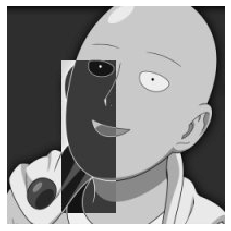

In [4]:
img = cv2.imread(".\\images\\saitama.jpg",0)
regions([190,50],[50,100],img)

<a id='script2'></a>

<h2>3. Script de troca de quadrantes de uma imagem</h2>

<p style='text-align: justify;'>Esta seção descreverá um script realizado em Python que recebe uma imagem e inverte os quatro quadrantes da imagem tendo como eixos as diagonais principal e secundária. Neste script, são abordadas imagens coloridas no formato RGB e são utilizadas as bibliotecas da Seção 2.1.</p>



<a id='funcao2'></a>

<h3>3.1 Função de troca de áreas</h3>

<p style='text-align: justify;'>A função "change_areas" recebe as três matrizes de cores de uma imagem por parâmetro e efetua a troca das regiões da imagem. A imagem de entrada é separa nas seguintes regiões:</p>

<table>
<tr>
    <td>A</td>
    <td>B</td>
</tr>
<tr>
    <td>C</td>
    <td>D</td>
</tr>
</table>

<p style='text-align: justify;'>A imagem exibida como saída deverá estar na seguinte ordem:</p>

<table>
<tr>
    <td>D</td>
    <td>C</td>
</tr>
<tr>
    <td>B</td>
    <td>A</td>
</tr>
</table>

<p style='text-align: justify;'>
Como a imagem processada era colorida, utilizou-se o operador ":" que acessa todos os elementos dessa dimensão da matriz. Nas atribuições, foi utilizado para acessar todas as componentes (RGB) para serem atribuídas com ordem trocada à outra matriz. Para exibir as imagens utilizando o "matplotlib" foi necessário converter o esquema de cores devido à forma como o openCV lê. O "matplotlib" usa a sequência de cores BGR, o que faz com que as componentes que eram vermelho na matriz incial passem a representar a componente azul no plot. Isto se evidenciará com o exemplo mostrado abaixo.
</p>

In [5]:
def change_areas(img):
    A = img[0:np.shape(img)[0]//2,0:np.shape(img)[0]//2,:]
    B = img[0:np.shape(img)[0]//2,np.shape(img)[0]//2:np.shape(img)[0],:]
    C = img[np.shape(img)[0]//2:np.shape(img)[0],0:np.shape(img)[0]//2,:]
    D = img[np.shape(img)[0]//2:np.shape(img)[0],np.shape(img)[0]//2:np.shape(img)[0],:]

    img1 = np.zeros(np.shape(img),dtype=np.uint8)
    img1[0:np.shape(img)[0]//2,0:np.shape(img)[0]//2,:] = D
    img1[0:np.shape(img)[0]//2,np.shape(img)[0]//2:np.shape(img)[0],:] = C
    img1[np.shape(img)[0]//2:np.shape(img)[0],0:np.shape(img)[0]//2,:] = B
    img1[np.shape(img)[0]//2:np.shape(img)[0],np.shape(img)[0]//2:np.shape(img)[0],:] = A

    plt.figure(1,[15,15])
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Imagem de entrada")

    plt.subplot(132)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Imagem com regiões trocadas")

    plt.subplot(133)
    plt.imshow(img)
    plt.axis("off")
    plt.title("Imagem sem conversão de cores")

<a id='result2'></a>

<h3>3.2 Resultados</h3>

<p style='text-align: justify;'>Abaixo, tem-se um exemplo de aplicação, bem como a versão da imagem sem a conversão de cores para a exibição:</p>

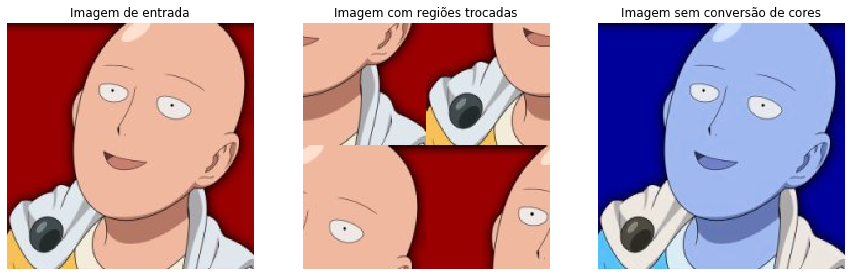

In [6]:
img = cv2.imread(".\\images\\saitama.jpg")
a = change_areas(img)